# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file ='./train.p'
validation_file='./valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

The above code loads the training, validation and testing data sets.

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
import numpy as np
# TODO: Number of training examples
n_train = np.size(X_train,0)
# TODO: Number of testing examples.
n_test = np.size(X_test,0)

# TODO: What's the shape of an traffic sign image?
image_shape = str(np.size(X_train,1))+' x '+str(np.size(X_train,2))

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.size(np.unique(y_train),0) #done

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = 32 x 32
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset (pick random images to plot)

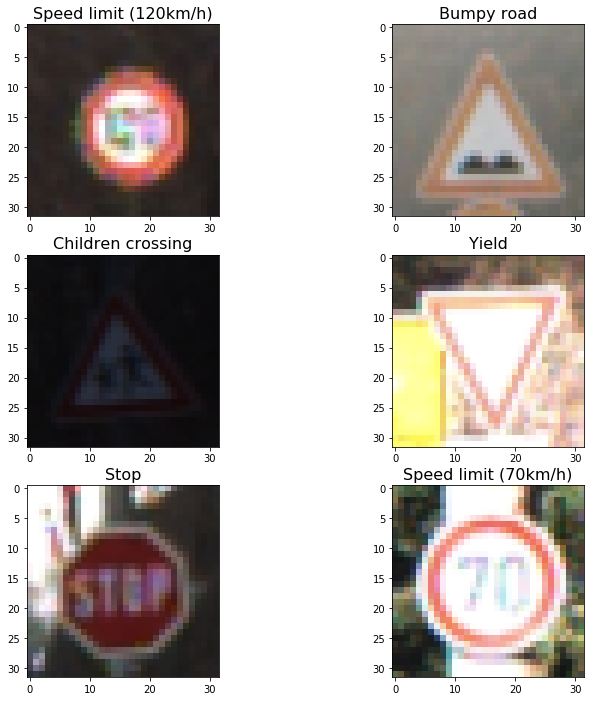

In [5]:
import csv
signs_label=[]
with open('signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        signs_label.append(row['SignName'])
        
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random
fig = plt.figure(figsize=(12,12))
for ii in range(1,7):
    a = fig.add_subplot(3,2,ii)
    a_rand_number = random.randrange(np.size(X_train,0))
    fig_1 = X_train[a_rand_number]
    plt.imshow(fig_1)
    plt.title(signs_label[y_train[a_rand_number]],fontsize=16)

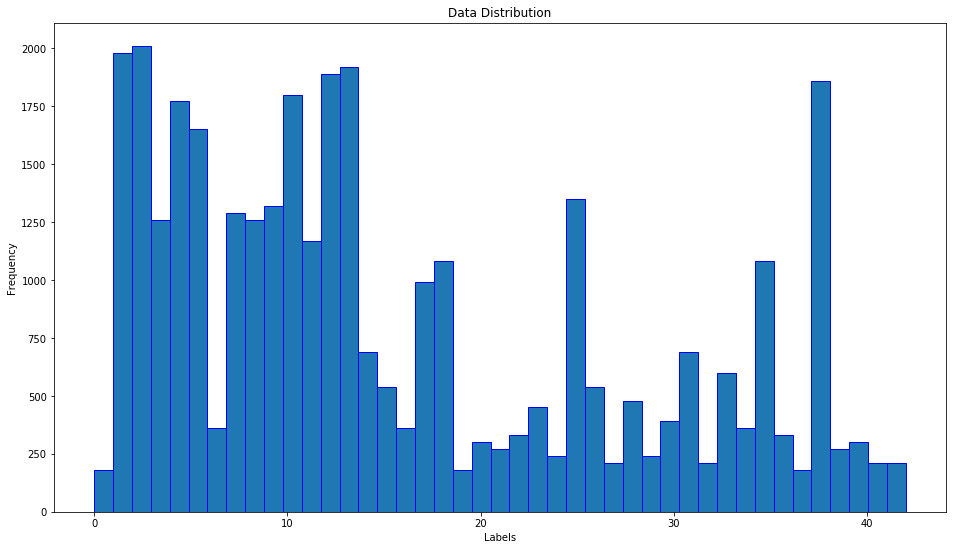

In [4]:
# %% test 3
############################################################################
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
#%matplotlib inline
#plt.hist(y_train, bins=43, cumulative=True, histtype='step')
fig = plt.figure(figsize=(16,9))
plt.hist(y_train, bins=43,histtype='bar',edgecolor='b')
#plt.xticks(range(43))
plt.title("Data Distribution")
plt.xlabel("Labels")
plt.ylabel("Frequency")
fig = plt.gcf()
plt.show()


The histogram shows discrepancy in uniformity of sample set. 
Some labels have very little samples, while some have many more samples. 

In [5]:
unique_labels, unique_count = np.unique(y_train, return_counts=True) #done
y_index=[]
for idx, val in enumerate(unique_count):
    if val <= 3000:
        print(idx,val)
        y_index = np.append(y_index,np.where(y_train==int(idx))) 
        '''
        this array contains neglected children
        '''

0 180
1 1980
2 2010
3 1260
4 1770
5 1650
6 360
7 1290
8 1260
9 1320
10 1800
11 1170
12 1890
13 1920
14 690
15 540
16 360
17 990
18 1080
19 180
20 300
21 270
22 330
23 450
24 240
25 1350
26 540
27 210
28 480
29 240
30 390
31 690
32 210
33 599
34 360
35 1080
36 330
37 180
38 1860
39 270
40 300
41 210
42 210


Printing the number of samples for each label shows that 'Label 0' has 180 samples while 'Label 38' has 1860 samples.'

## Data Augmentation
The original data set channeled through a neural network resulted in poor accuracy ~89%. 
Changing the layers, hyper parameters, pre-processing techniques, resulted in minor improvements. 
It seemed the network won't train well on the data set doesn't contain enough samples.
To remove discrepancy from original data set i.e. the following code increases the number of samples so that the data is uniformly distributed

Original number of samples in training data: 34799
Number of samples in training data after adding augmented images: 344043


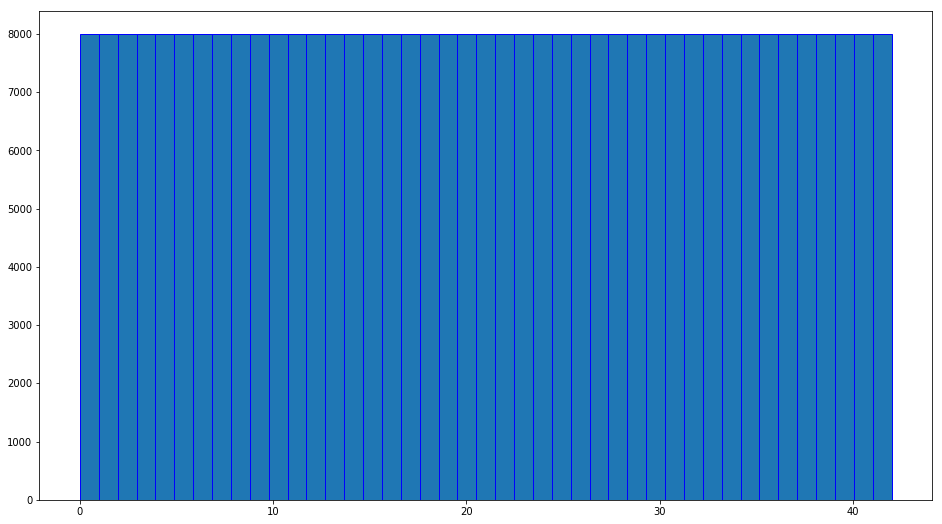

In [6]:
############################################################################
'''
this section will grab neglected children and append them at the end of x_train
'''
############################################################################
new_y = y_index.astype(int)
new_X_train = X_train[new_y]
new_y_train = y_train[new_y]
print('Original number of samples in training data:',len(X_train))
import cv2
import random
import skimage
def rotate_image(img):
     rows,cols,depth = img.shape
     M = cv2.getRotationMatrix2D((cols/2,rows/2),random.randrange(-15,+15),random.uniform(1,1.2))
     rotated_img = cv2.warpAffine(img,M,(cols,rows))
     #return rotated_img.astype(uint8)
     return np.asarray(rotated_img, dtype="uint8")
def translate_image(img):
     rows,cols,depth = img.shape
     #M = cv2.getRotationMatrix2D((cols/2,rows/2),random.randrange(-15,+15),random.uniform(0.9,1.1))
     M = np.float32([[1,0,random.randint(-4,4)],[0,1,random.randint(-4,4)]])
     translated_img = cv2.warpAffine(img,M,(cols,rows))
     #return rotated_img.astype(uint8)
     return np.asarray(translated_img, dtype="uint8")
def add_noise(img):
    noisy_image = skimage.util.random_noise(img, mode='gaussian', seed=None, clip=True) 
    return np.asarray(noisy_image, dtype="uint8")
def add_blur(img):
    blur_effect = 5
    blurred_image = cv2.GaussianBlur(img, (blur_effect, blur_effect), 0)
    return blurred_image
unique_labels, unique_count = np.unique(y_train, return_counts=True) #done
for jj in range(len(unique_count)):
    new_index=[]
    new_y=[]
    new_X_train=[]
    new_y_train=[]
    count = unique_count[jj]
    new_index = np.append(new_index,np.where(y_train==int(jj)))
    new_y = new_index.astype(int)
    new_X_train = X_train[new_y]
    new_y_train = y_train[new_y]
    new_size = 8000
    app_X=np.empty([new_size-count+1,32,32,3],dtype=np.uint8)
    #np.empty((w, h, 3), dtype=np.uint8)
    app_Y=np.empty([new_size-count+1],dtype=np.uint8)
    kk = 0
    while count <=new_size:
        cur_index = random.randint(0,len(new_X_train)-1)
        #print(cur_index)
        case = random.randint(0,4)
        if case == 0:
            app_X[kk] = rotate_image(new_X_train[cur_index])
            #print('rotated')
        if case == 1:
            app_X[kk] = translate_image(new_X_train[cur_index])
            #print('translated')
        if case == 2:
            app_X[kk] = add_noise(new_X_train[cur_index])
            #print('added noise')
        if case == 3:
            app_X[kk] = add_blur(new_X_train[cur_index])
            #print('added noise')
        if case == 4:
            image=rotate_image(new_X_train[cur_index])
            image = translate_image(image)
            image = add_noise(image)
            app_X[kk] = add_blur(image)
            #print('i did all three')

        app_Y[kk] = new_y_train[cur_index]
        count = count + 1
        kk = kk + 1
    X_train = np.append(X_train,app_X, axis=0)
    y_train = np.append(y_train,app_Y, axis=0)
    
fig = plt.figure(figsize=(16,9))
plt.hist(y_train, bins=43,histtype='bar',edgecolor='b')
        #rand_indices = np.random.randint(len(new_X_train),size=sz)
unique_labels, unique_count = np.unique(y_train, return_counts=True) #done
y_index=[]
for idx, val in enumerate(unique_count):
    if val <= 10000:
        #print(idx,val)
        y_index = np.append(y_index,np.where(y_train==int(idx)))
        
print('Number of samples in training data after adding augmented images:',len(X_train))


The data augmentation is performed by the following loop 

new count = 8000

while count of each label is less than new count

    randomly pick 1 to 5
    1. rotate the image
    2. translate the image
    3. add noise
    4. blur the image
    5. perform all of the above 
    append new image to training data set, also append correct label 
end while loop 

8000 was picked as the target number of samples per label, until the validation accuracy exceeded 95%

This while loop will append augmented images to the original data set until all labels have 8000 images.
This ensures the data is uniformly distributed, further the noise, translation, blurring and rotation helps in making the model robust. 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).


### Pre-process the Data Set (normalization, grayscale, etc.)

Preprocessing is done by converting the 3 channel image to 1 channel (gray scaling)

In [15]:
# %% main network
############################################################################
############################################################################
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114]).reshape((np.size(rgb,0),32,32,1))
X_train = rgb2gray(X_train)
X_valid = rgb2gray(X_valid)   
X_test = rgb2gray(X_test)   
X_train, y_train = shuffle(X_train, y_train)
############################################################################

### Model Architecture

Layer 1: Convolutional. Input = 32x32x1 Output = 30x30x32

Layer 2: Convolutional. Input  = 30x30x32 Output = 28x28x32

Pooling. Input =28x28x32. Output = 14x14x32

Layer 3: Convolutional. Iutput = 14x14x32 Output = 12x12x64

Layer 4: Convolutional. Iutput = 12x12x64 Output = 10x10x64

Pooling. Input = 10x10x64. Output = 5x5x64

Layer 5: Convolutional. Iutput = 5x5x64 Output = 3x3x128

Flatten. Input = 3x3x128. Output = 1152

Layer 6: Fully Connected. Input = 1152. Output = 1024

Layer 7: Fully Connected. Input = 1024. Output = 1024

Dropout (0.65)

Layer 8: Fully Connected. Input = 1024. Output = 43

Learning rate = 0.001

Optimizer = AdamOptimizer


In [16]:
############################################################################
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
EPOCHS = 10
BATCH_SIZE = 128
############################################################################
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 30x30x32. Output = 15x15x32.
    #conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Input  = 30x30x32.Output = 28x28x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input =28x28x32. Output = 14x14x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    '''
    new addition
    '''
    ###################################################
    # Layer 3: Convolutional. Iutput = 14x14x32. Output = 12x12x64
    global conv3
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3   = tf.nn.relu(conv3)
    # Layer 4: Convolutional. Iutput = 12x12x64. Output = 10x10x64
    conv4_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 64), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(64))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b
    conv4   = tf.nn.relu(conv4)

    # Pooling. Input = 10x10x64. Output = 5x5x64.
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 5: Convolutional. Iutput = 5x5x64. Output = 3x3x128
    conv5_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(128))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='VALID') + conv5_b
    conv5   = tf.nn.relu(conv5)
    ###################################################
    # SOLUTION: Flatten. Input = 3x3x128. Output = 1152.
    fc0   = flatten(conv5)
    
    # SOLUTION: Layer 6: Fully Connected. Input = 1152. Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1152, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 7: Fully Connected. Input = 1024. Output = 1024.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 1024), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(1024))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    '''
    # Idea 1: Dropout here
    '''
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 8: Fully Connected. Input = 1024. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(1024, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits
############################################################################
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
'''
# Idea 1: Placeholder is defined here
'''
keep_prob = tf.placeholder(tf.float32) # probability to keep units

############################################################################
rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
############################################################################
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

In [17]:
############################################################################
from datetime import datetime
############################################################################
with tf.Session() as sess:
   sess.run(tf.global_variables_initializer())
   num_examples = len(X_train)
   
   print("Training...")
   startTime = datetime.now()
   print()
   for i in range(EPOCHS):
       startTime = datetime.now()
       X_train, y_train = shuffle(X_train, y_train)
       for offset in range(0, num_examples, BATCH_SIZE):
           end = offset + BATCH_SIZE
           batch_x, batch_y = X_train[offset:end], y_train[offset:end]
           sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.65})
       validation_accuracy = evaluate(X_valid, y_valid)
       print("EPOCH {} ...".format(i+1))
       print("Validation Accuracy = {:.3f}".format(validation_accuracy))
       print(str((datetime.now() - startTime).total_seconds()) + ' secs')
       print()

   saver.save(sess, './garys_nn.ckpt')
   print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.894
473.234018 secs

EPOCH 2 ...
Validation Accuracy = 0.954
514.186064 secs

EPOCH 3 ...
Validation Accuracy = 0.971
480.82402 secs

EPOCH 4 ...
Validation Accuracy = 0.971
478.953133 secs

EPOCH 5 ...
Validation Accuracy = 0.978
515.011869 secs

EPOCH 6 ...
Validation Accuracy = 0.979
505.064677 secs

EPOCH 7 ...
Validation Accuracy = 0.978
555.043788 secs

EPOCH 8 ...
Validation Accuracy = 0.980
529.043727 secs

EPOCH 9 ...
Validation Accuracy = 0.977
521.078052 secs

EPOCH 10 ...
Validation Accuracy = 0.981
525.860487 secs

Model saved


### Validation accuracy is fairly high (~98%)

In [18]:
############################################################################
from datetime import datetime
############################################################################
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    #saver = tf.train.import_meta_graph('gary_nn.meta')
    #saver.restore(sess,tf.train.latest_checkpoint('./'))
    saver.restore(sess,'./garys_nn.ckpt')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.955


### The testing accuracy is at 95.5%
#### The model has not seen this data before. The human level accuracy is around 98.8% [1] 

[1] Sermanet, P., & LeCun, Y. (2011, July). Traffic sign recognition with multi-scale convolutional networks. In Neural Networks (IJCNN), The 2011 International Joint Conference on (pp. 2809-2813). IEEE.
Chicago	

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

### Load and Output the Images

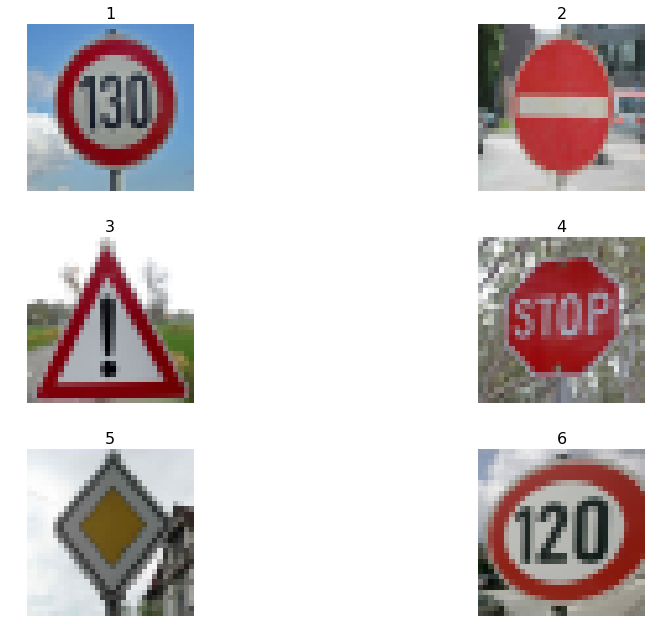

In [20]:
# %% load randomly downloaded 5 images    
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv
path = os.listdir("random_images/")
i=1
#fig = plt.figure(figsize=(12,13))
fig = plt.figure(figsize=(16,9))
int_images=np.uint8(np.zeros((6,32,32,3)))
for filename in path:
    image = mpimg.imread("random_images/"+filename)
    #image = cv2.resize(image,(32,32))
    image = cv2.resize(image, (32,32), interpolation = cv2.INTER_AREA)
    a=fig.add_subplot(3,2,i)
    plt.imshow(image) 
    plt.axis('off')
    plt.title(i,fontsize=16)
    int_images[i-1]=image
    i=i+1
plt.tight_layout()

int_images_proc = rgb2gray(int_images)   

These images were downloaded using google image search.

### Predict the Sign Type for Each Image

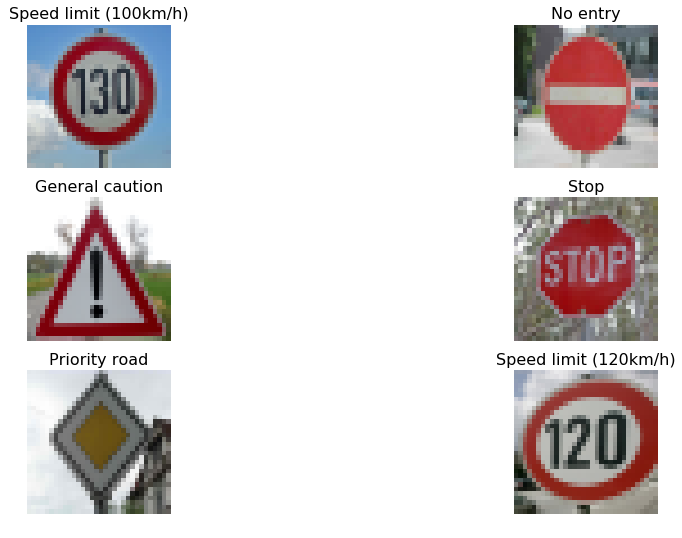

In [22]:
 # %% prediction code
def predict_sign(X_data,sess):
    pred = sess.run(tf.argmax(logits,1),feed_dict={x: X_data, keep_prob: 1.0}) 
    #pred = sess.run(tf.nn.softmax(logits),feed_dict={x: X_data, keep_prob: 1.0}) 
    return pred      
with tf.Session() as sess:
    #saver = tf.train.import_meta_graph('lenet.meta')
    #saver.restore(sess,tf.train.latest_checkpoint('./'))
    saver.restore(sess, './garys_nn.ckpt')
    ident_label=predict_sign(int_images_proc, sess)
    
fig = plt.figure(figsize=(16,9))
for jj in range(6):
    #print(jj)
    fig.add_subplot(3,2,jj+1)
    plt.imshow(int_images[jj]) 
    plt.title(signs_label[ident_label[jj]],fontsize=16)
    plt.axis('off')
plt.show()

The first image is not part of the training database. 
The model was trained for other five images (downloaded from google). 
The model identified the other five images accurately. The model prediction accuracy is 100%. 

The model misidentified the first image (130 kmph) as 100 kmph sign.
Although it did identify the image as speed limit sign. Since the model was not trained for this particular speed limit sign, misidentification was obvious. To avoid this from happening, all types of signs should be included in training database (for real world application). Multiple models can be implemented, one to identify the numbers and other to identify the shape of the sign. 

### Analyze Performance

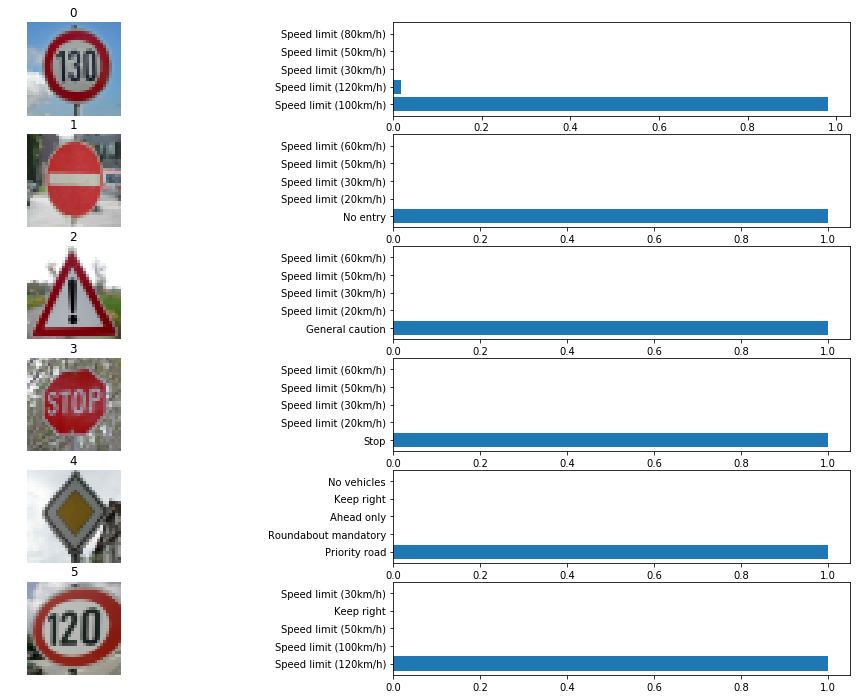

TopKV2(values=array([[  9.81133401e-01,   1.88665707e-02,   2.05999395e-09,
          5.31669951e-11,   1.22860958e-11],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   3.97247948e-23,   1.40024832e-25,
          1.16092576e-26,   7.37117525e-31],
       [  1.00000000e+00,   1.26145643e-12,   8.20579282e-13,
          1.11385741e-13,   7.83762630e-17]], dtype=float32), indices=array([[ 7,  8,  1,  2,  5],
       [17,  0,  1,  2,  3],
       [18,  0,  1,  2,  3],
       [14,  0,  1,  2,  3],
       [12, 40, 35, 38, 15],
       [ 8,  7,  2, 38,  1]], dtype=int32))


In [27]:
# %%plot softmax probabilities
num_prob = 5 #top x probabilities - num_prob is x
def show_prob(X_data,sess):
    prob_ident = sess.run(tf.nn.softmax(logits),feed_dict={x: X_data, keep_prob: 1.0})
    top5 = tf.nn.top_k(prob_ident, k=num_prob)
    return sess.run(top5)      
with tf.Session() as sess:
    #saver = tf.train.import_meta_graph('lenet.meta')
    #saver.restore(sess,tf.train.latest_checkpoint('./'))
    saver.restore(sess, './garys_nn.ckpt')
    top5_sign_ident=show_prob(int_images_proc, sess)

fig = plt.figure(figsize=(18,12))
for kk in range(num_prob+1):
    fig.add_subplot(6,2,2*kk+1)
    plt.imshow(int_images[kk]) 
    plt.title(kk)
    plt.axis('off')
    fig.add_subplot(6,2,2*kk+2)
    plt.barh(np.arange(1, num_prob+1, 1), top5_sign_ident.values[kk, :])
    y_label = [signs_label[z] for z in top5_sign_ident.indices[kk]]
    #labs=[ident_label[jj] for jj in top5_sign_ident.indices[kk]]
    plt.yticks(np.arange(1, num_prob+1, 1), y_label)
plt.show()
print(top5_sign_ident)

The model above image shows the probabilities for the identification. 
The network is robust in identifying the last five images. 
However, the network has misidentified the first image (130 kmph). The network found it 98% closer to the 100 kmph sign and 2% closer to 120 kmph sign. It did identify the sign as speed limit rather than any other sign. 

---
## Step 4 - Visualizing the network 

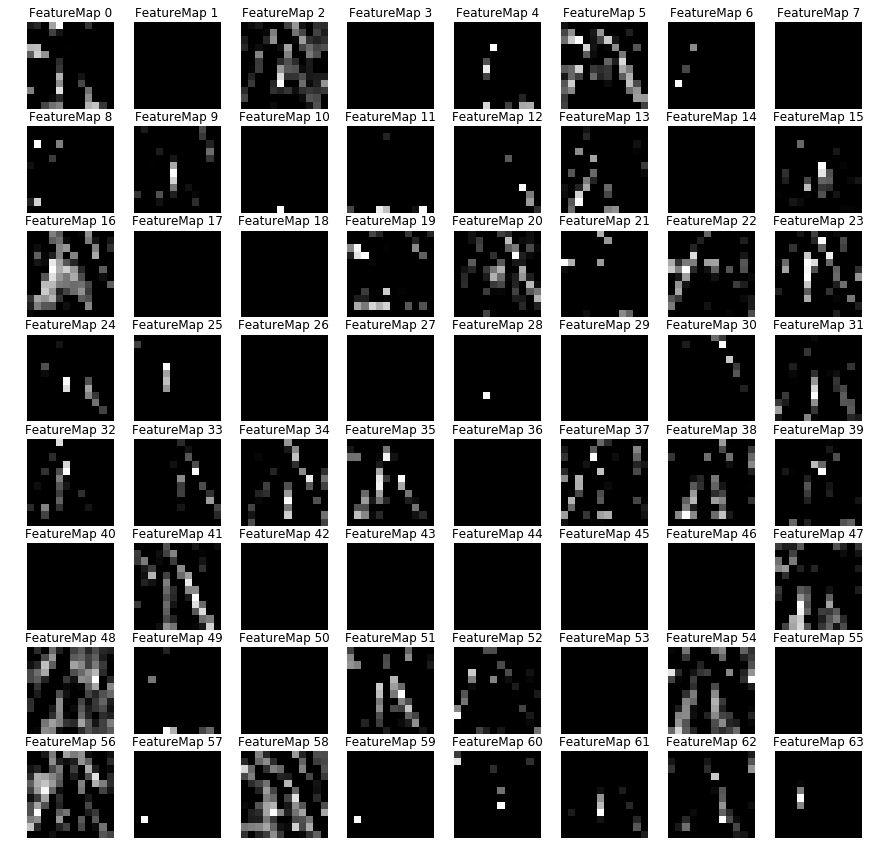

In [29]:
# %% visualizing the network 
def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(8,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        plt.axis('off')
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

visual_test=np.uint8(np.zeros((1,32,32,1)))
visual_test[0] = int_images_proc[random.randint(0,len(int_images_proc)-1)]

with tf.Session() as sess:
    #saver = tf.train.import_meta_graph('lenet.meta')
    #saver.restore(sess,tf.train.latest_checkpoint('./'))
    saver.restore(sess, './garys_nn.ckpt')
    visualize_this=outputFeatureMap(visual_test,conv3)